Analizemos la dependencia del motifs recíproco con la calidad del aprendizaje


Empezemos con los archivos de prueba 5

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
#Paso los archivos con los pesos a matrices

def csv_to_matrix(filename):
    df = pd.read_csv(filename, header=None) 
    matrix = df.values 
    return matrix

#quiero usar los mismos colores para los distintos valores de pqif

pqif_vector = [0, 0.5, 1]
colores = ['r', 'g', 'b']

In [4]:
def motifs(w,N):
    
    w=w-np.mean(w)
    
    ww=np.matmul(w,w)
    wtw=np.matmul(w.T,w)
    wwt=np.matmul(w,w.T)
    
    sigma2=np.trace(wwt)/N
    
    tau_rec=np.trace(ww)
    tau_rec/=sigma2*N
    
    tau_div=np.sum(wwt)-np.trace(wwt)
    tau_div/=sigma2*N*(N-1)
    
    tau_con=np.sum(wtw)-np.trace(wtw)
    tau_con/=sigma2*N*(N-1)
    
    tau_chn=2*(np.sum(ww)-np.trace(ww))
    tau_chn/=sigma2*N*(N-1)
    
    return sigma2,tau_rec,tau_div,tau_con,tau_chn


In [5]:
def cargar_archivo_parametros(filename_parametros):
    # Lee el archivo CSV
    df = pd.read_csv(filename_parametros)
    
    # Convierte el DataFrame a un diccionario de Python
    parametros = df.to_dict(orient='records')[0]
    
    # Retorna el diccionario de parámetros
    return parametros



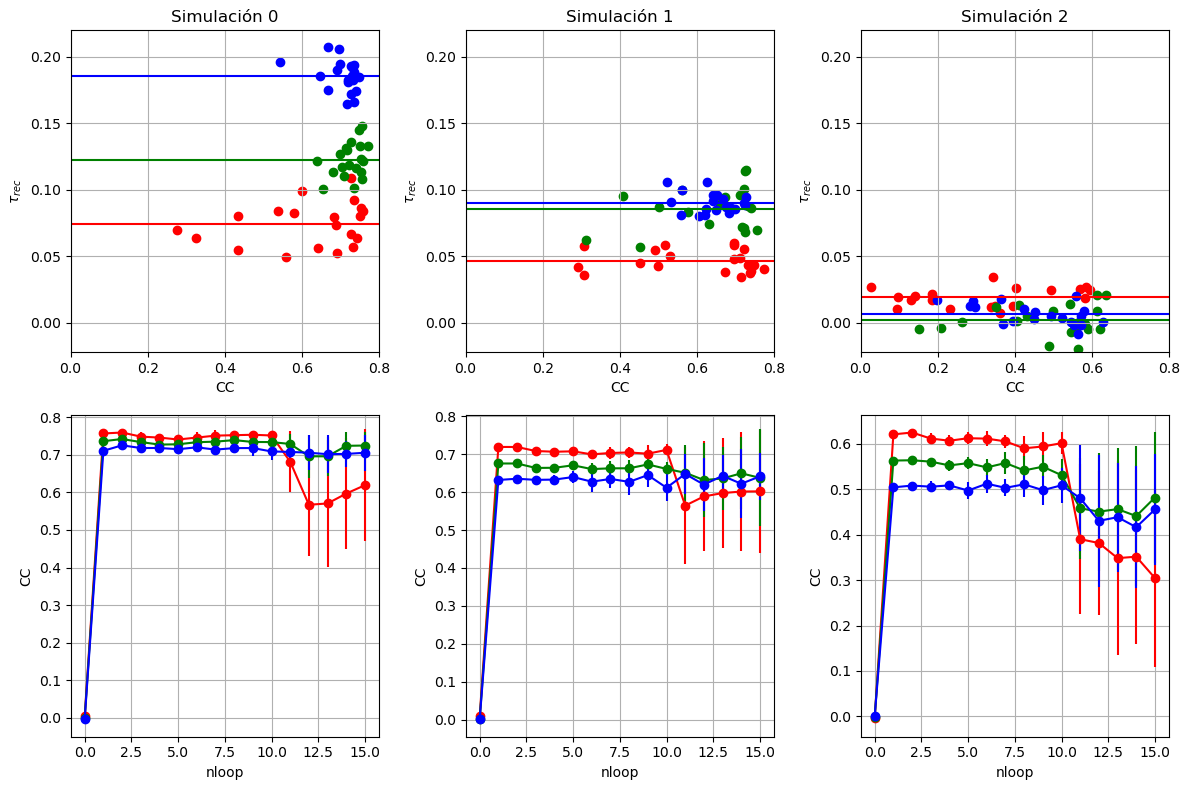

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # Modifica el tamaño aquí según sea necesario
for num_sim in range(3):

    nombre_archivo = f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
    data = pd.read_csv(nombre_archivo)

    # Llama a la función cargar_archivo_parametros con el nombre del archivo CSV
    nombre_carpeta = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}"  # Reemplaza 'ruta/a/la/carpeta' con la ruta real de tu carpeta
    filename_parametros = os.path.join(nombre_carpeta, f'simulacion_{num_sim}_parametros.csv')  # Reemplaza 'simulacion_1_parametros.csv' con el nombre real de tu archivo CSV
    parametros = cargar_archivo_parametros(filename_parametros)

    # Ahora puedes acceder a los parámetros como lo harías normalmente
    N = parametros['N']
    nloop = parametros['nloop']
    cant_seed = parametros['cant_seed']
    gsyn = parametros['gsyn']

    # Crear una figura más pequeña con dos plots separados, cada uno con tres subplots


    # Obtener los valores únicos de 'pqif'
    pqif_values = data['pqif'].unique()

    df_nloop = data[(data['nloop'] == (nloop-1))]

    # Iterar sobre los valores únicos de 'pqif' para graficar todas las líneas en el subplot actual
    for i in range(len(pqif_values)):
        pqif_value = pqif_values[i]
        color = colores[i]
        axs[0, num_sim].scatter(df_nloop[df_nloop['pqif'] == pqif_value]['cc'], df_nloop[df_nloop['pqif'] == pqif_value]['tau_rec'], label=f'pqif={pqif_value}', color=color)
        axs[0, num_sim].axhline(np.mean(df_nloop[df_nloop['pqif'] == pqif_value]['tau_rec']), color = color)

    # Ajustar el diseño de los subplots
    axs[0, num_sim].set_xlim(0, 0.8)
    axs[0, num_sim].grid()
    axs[0, num_sim].set_xlabel('CC')
    axs[0, num_sim].set_ylabel(r'$\tau_{rec}$')
    axs[0, num_sim].set_title(f'Simulación {num_sim}')
    axs[0, num_sim].set_ylim(-0.022, 0.22)

    # Iterar sobre los valores únicos de 'pqif' para graficar todas las líneas en el subplot actual
    for i in range(len(pqif_values)):
        pqif_value = pqif_values[i]
        color = colores[i]
        # Filtrar los datos para el valor actual de 'pqif'
        data_pqif = data[(data['pqif'] == pqif_value) ]

        # Calcular el promedio y la desviación estándar para cada combinación de 'nloop' y 'columna'
        grouped_data = data_pqif.groupby(['nloop'])
        for columna in ['cc']:
            grouped_column_data = grouped_data[columna].agg(['mean', 'std']).reset_index()

            # Graficar cc vs nloop para cada 'pqif' con barras de error
            axs[1, num_sim].errorbar(grouped_column_data['nloop'], grouped_column_data['mean'], yerr=grouped_column_data['std'], label=f'pqif={pqif_value}', color = color, fmt='-o')
            
        # Agregar leyenda al subplot actual


    # Ajustar el diseño de los subplots
    axs[1, num_sim].grid()
    axs[1, num_sim].set_xlabel('nloop')
    axs[1, num_sim].set_ylabel('CC')
    #axs[1, num_sim].set_ylim(0.5, 0.775)
# Ajustar los subplots para evitar solapamientos
plt.tight_layout()

# Mostrar la figura
plt.show()

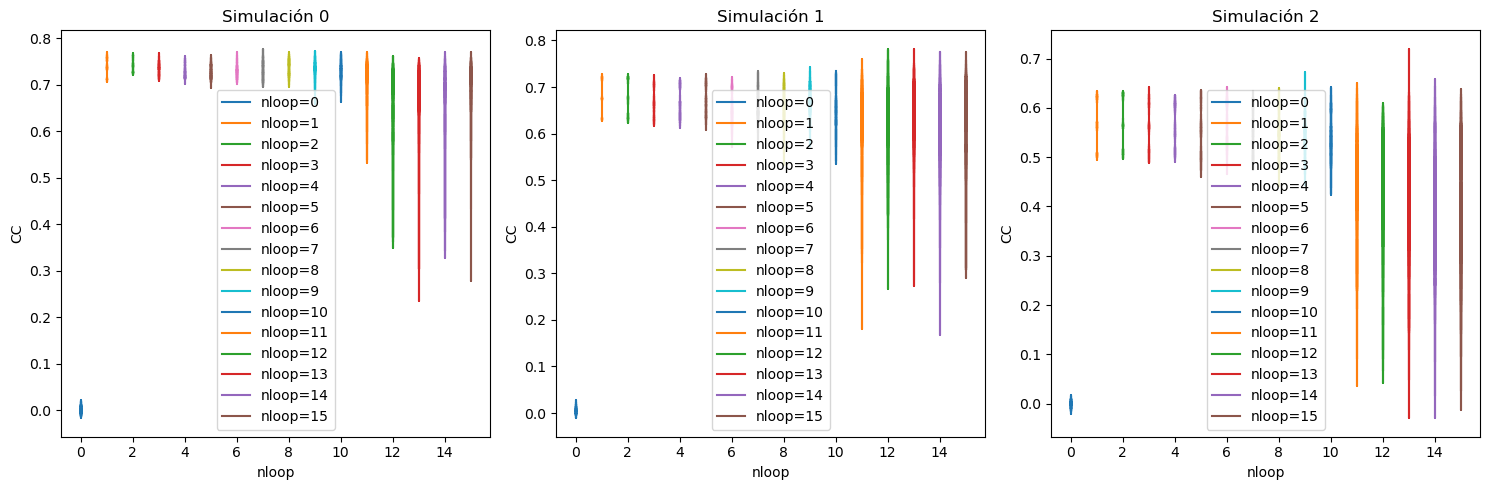

In [7]:
# Definir el tamaño de la figura
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Bucle sobre las simulaciones
for num_sim in range(3):
    nombre_archivo = f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
    data = pd.read_csv(nombre_archivo)

    # Llama a la función cargar_archivo_parametros con el nombre del archivo CSV
    nombre_carpeta = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}"  # Reemplaza 'ruta/a/la/carpeta' con la ruta real de tu carpeta
    filename_parametros = os.path.join(nombre_carpeta, f'simulacion_{num_sim}_parametros.csv')  # Reemplaza 'simulacion_1_parametros.csv' con el nombre real de tu archivo CSV
    parametros = cargar_archivo_parametros(filename_parametros)

    # Ahora puedes acceder a los parámetros como lo harías normalmente
    N = parametros['N']
    nloop = parametros['nloop']
    cant_seed = parametros['cant_seed']
    gsyn = parametros['gsyn']

    # Agrupar los datos por 'nloop'
    grouped_data = data.groupby('nloop')

    # Iterar sobre cada grupo y graficar los datos de cc para cada semilla
    for nloop_value, group in grouped_data:
        axs[num_sim].plot(group['nloop'], group['cc'], label=f'nloop={nloop_value}')

    # Configurar las etiquetas y título del gráfico
    axs[num_sim].set_xlabel('nloop')
    axs[num_sim].set_ylabel('CC')
    axs[num_sim].set_title(f'Simulación {num_sim}')
    axs[num_sim].legend()

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()



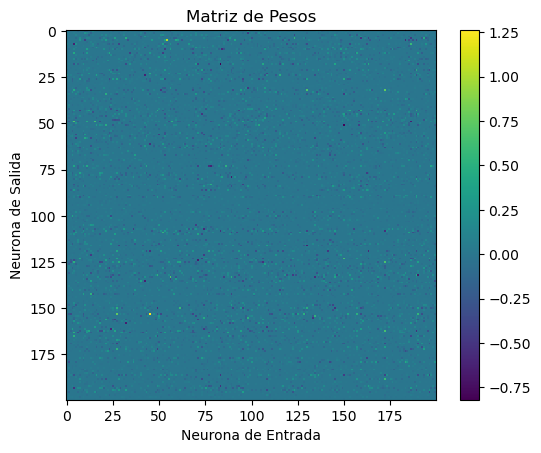

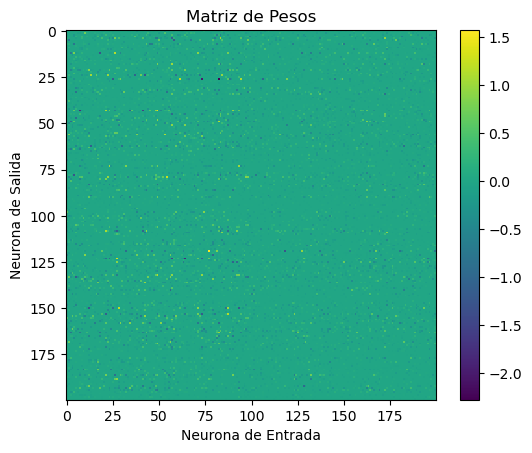

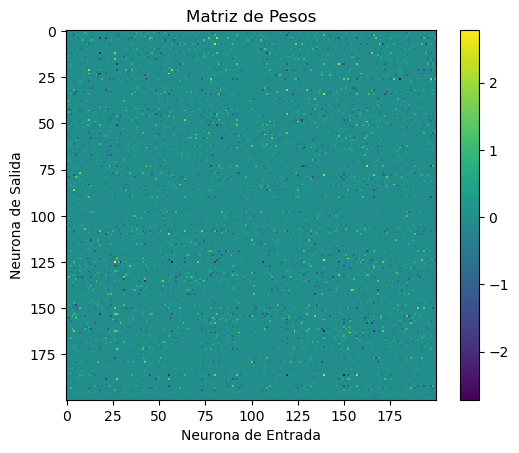

In [8]:
for i in range(len(pqif_vector)):
    pqif = pqif_vector[i]
    filename = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_0"
    weights_matrix = csv_to_matrix(filename)
    plt.imshow(weights_matrix, cmap='viridis', interpolation='nearest')

    # Añadir barra de color para representar los valores de los pesos
    plt.colorbar()

    # Añadir título y etiquetas de los ejes
    plt.title('Matriz de Pesos')
    plt.xlabel('Neurona de Entrada')
    plt.ylabel('Neurona de Salida')

    # Mostrar la gráfica
    plt.show()

[1.0, 5.0]
[2.0, 10.0]
[3.0, 15.0]
[1.0, 5.0]
[2.0, 10.0]
[3.0, 15.0]
[1.0, 5.0]
[2.0, 10.0]
[3.0, 15.0]


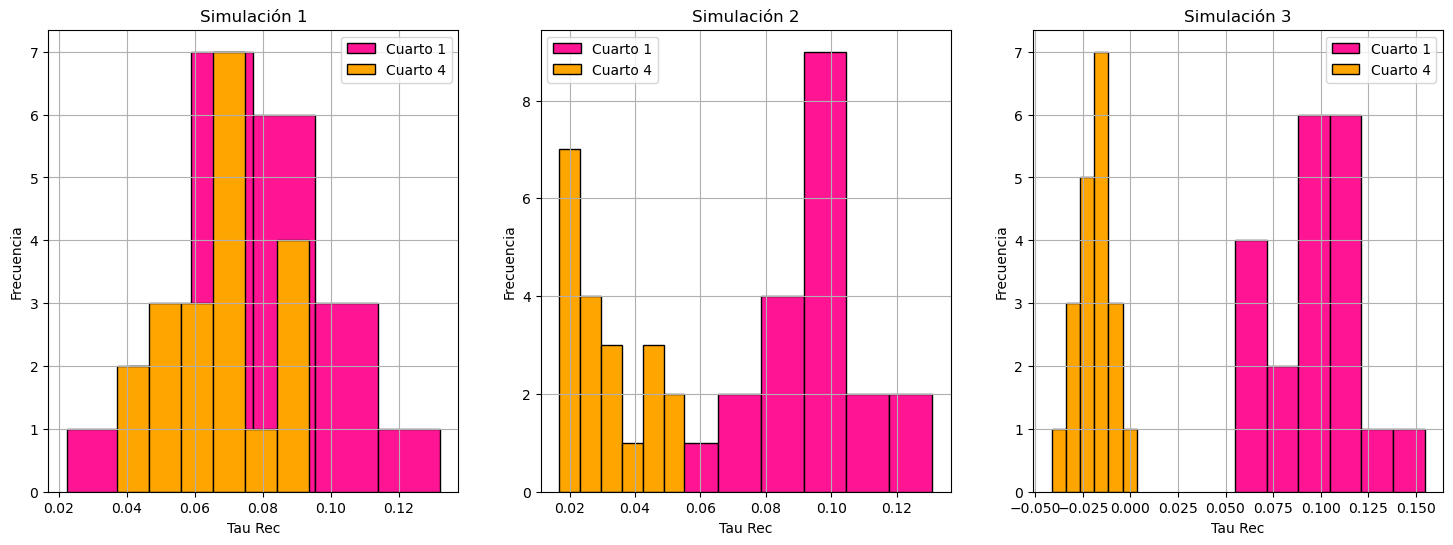

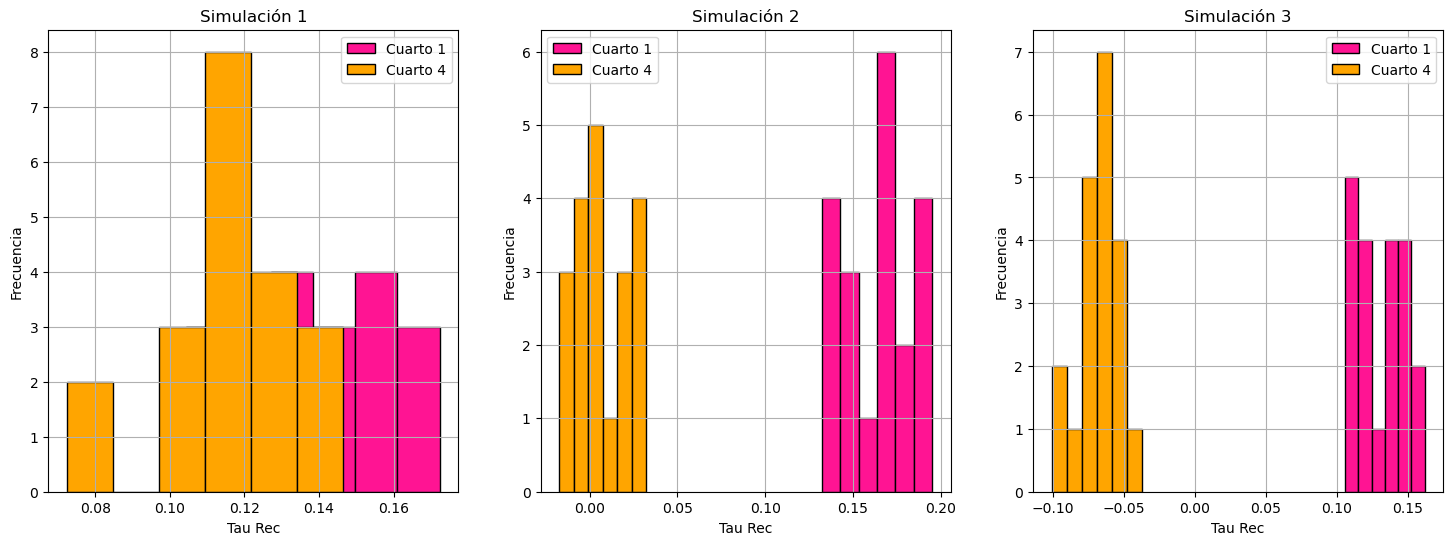

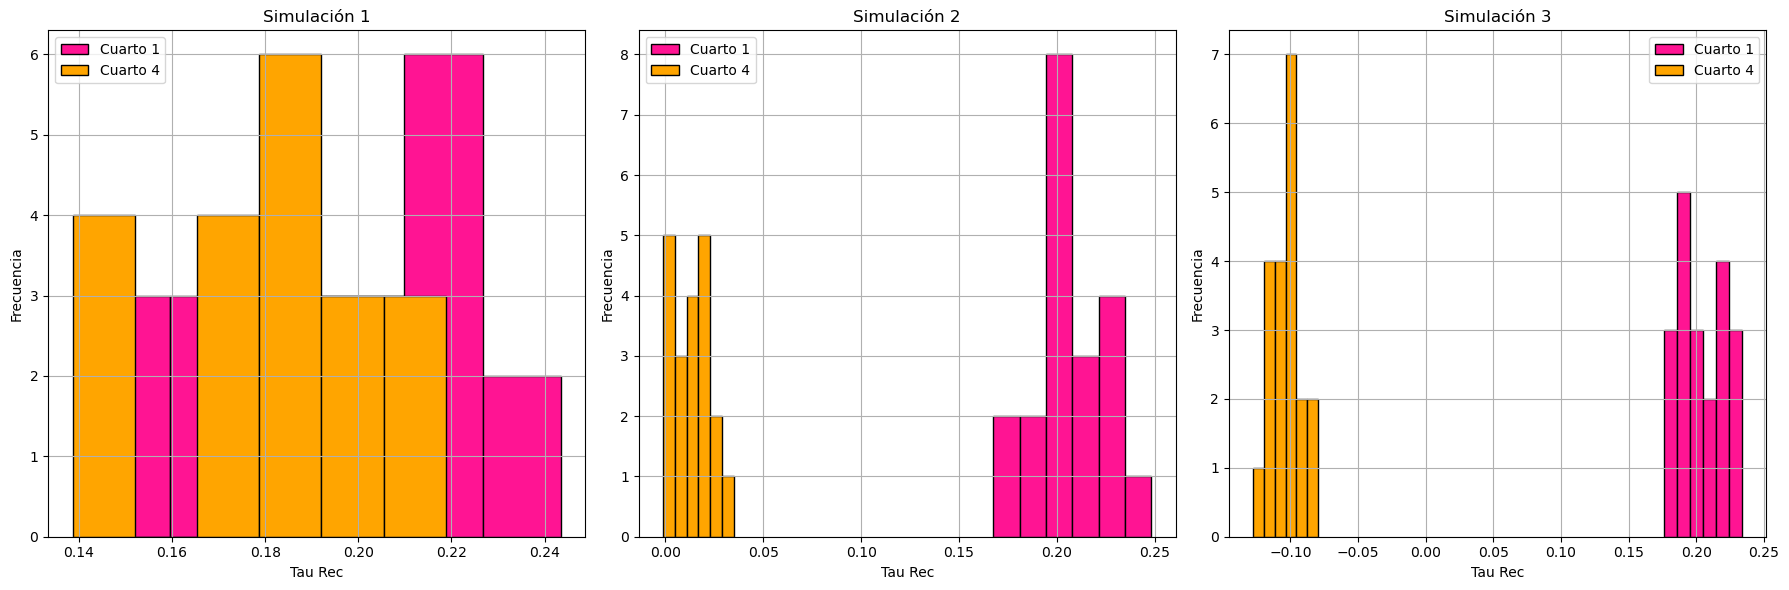

In [9]:
for pqif in pqif_vector:
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    for num_sim in range(3):

            cuadrante1, cuadrante2, cuadrante3, cuadrante4 = np.zeros(cant_seed, dtype=object), np.zeros(cant_seed, dtype=object), np.zeros(cant_seed, dtype=object), np.zeros(cant_seed, dtype=object)


            # Lee el archivo que contiene las frecuencias de los targets de cada neurona
            nombre_archivo_frecuencias = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_targets.csv"
            frecuencias_data = pd.read_csv(nombre_archivo_frecuencias)

            # Extrae los valores únicos de frecuencia
            valores_frecuencia = frecuencias_data['romega'].unique()
            valores_frecuencia = sorted(valores_frecuencia)
            print(valores_frecuencia)
            # Crea un diccionario para almacenar las neuronas asociadas a cada frecuencia
            neuronas_por_frecuencia = {frecuencia: frecuencias_data[frecuencias_data['romega'] == frecuencia]['Neurona'].tolist() for frecuencia in valores_frecuencia}

            # Concatena los vectores de índices de las neuronas para ambas frecuencias
            indices_frecuencia_1 = neuronas_por_frecuencia[valores_frecuencia[0]]
            indices_frecuencia_2 = neuronas_por_frecuencia[valores_frecuencia[1]]
            indices_concatenados = indices_frecuencia_1 + indices_frecuencia_2

            for k in range(cant_seed):
                matrix_ = csv_to_matrix(f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')

                matrix = np.zeros((N, N))

                for i in range(N):
                    for j in range(N):
                        matrix[i,j] = matrix_[indices_concatenados[i], indices_concatenados[j]]


                rows, cols = matrix.shape
                mid_row, mid_col = rows // 2, cols // 2

                cuadrante1[k] = matrix[:mid_row, :mid_col] # Cuadrante superior izquierdo
                cuadrante2[k] = matrix[:mid_row, mid_col:]   # Cuadrante superior derecho
                cuadrante3[k] = matrix[mid_row:, :mid_col]   # Cuadrante inferior izquierdo
                cuadrante4[k] = matrix[mid_row:, mid_col:]    # Cuadrante inferior derecho
                

            cuadrantes = [cuadrante1, cuadrante2, cuadrante3, cuadrante4]
            cuadrante_combined = np.zeros(4, dtype = object)
            colores = ['deeppink', 'orange']
            cuad = [0,3]
            

            # Histogramas para los dos cuadrantes en un mismo subplot
            for i, cd in enumerate(cuad):
                tau_rec_vect = np.zeros(cant_seed)

                for j in range(cant_seed):
                    w = cuadrantes[cd][j] 
                    sigma2, tau_rec, tau_div, tau_con, tau_chn = motifs(w, N)
                    tau_rec_vect[j] = tau_rec

                axs[num_sim].hist(tau_rec_vect, bins=6, color=colores[i], edgecolor = 'black', label=f'Cuarto {cd+1}')  # Ajusta el número de bins según tu preferencia
                axs[num_sim].set_title(f'Simulación {num_sim + 1}')  # Título del subplot
                axs[num_sim].set_xlabel('Tau Rec')  # Etiqueta del eje x
                axs[num_sim].set_ylabel('Frecuencia')  # Etiqueta del eje y
                axs[num_sim].grid(True)  # Mostrar cuadrícula
                axs[num_sim].legend()  # Mostrar leyenda
                

plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()



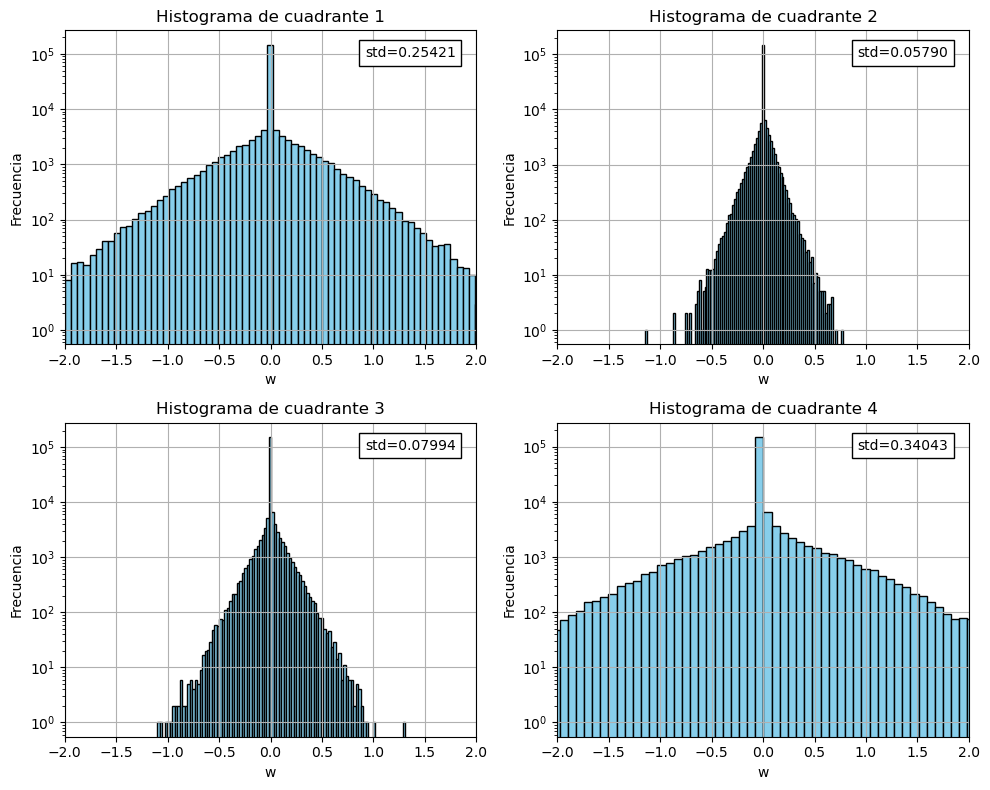

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for m, ax in enumerate(axes.flatten()):
    # Concatenar todas las matrices del cuadrante en una sola matriz
    cuadrante_combined = np.concatenate(cuadrantes[m])
    

    # Construir el histograma en el subplot correspondiente
    counts, bins = np.histogram(cuadrante_combined.flatten(), bins=100)
    std = np.std(cuadrante_combined.flatten())
    text_x = 0.95
    text_y = 0.95
    ax.text(text_x, text_y, f"std={std:.5f}", transform=ax.transAxes, ha='right', va='top', bbox=dict(facecolor='white', alpha=1))

    ax.hist(bins[:-1], bins, weights=counts, color='skyblue', edgecolor='black')
    ax.set_title(f'Histograma de cuadrante {m+1}')
    ax.set_xlabel('w')
    ax.set_ylabel('Frecuencia')
    ax.set_yscale("log")
    ax.set_xlim(-2,2)
    ax.grid(True)

plt.tight_layout()
plt.show()


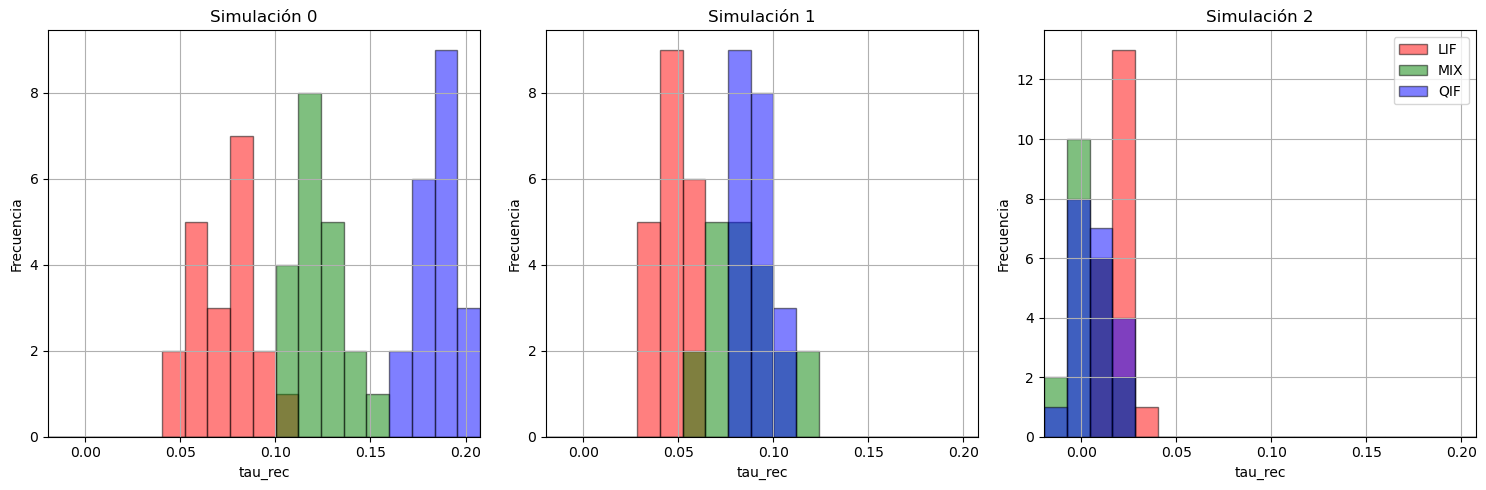

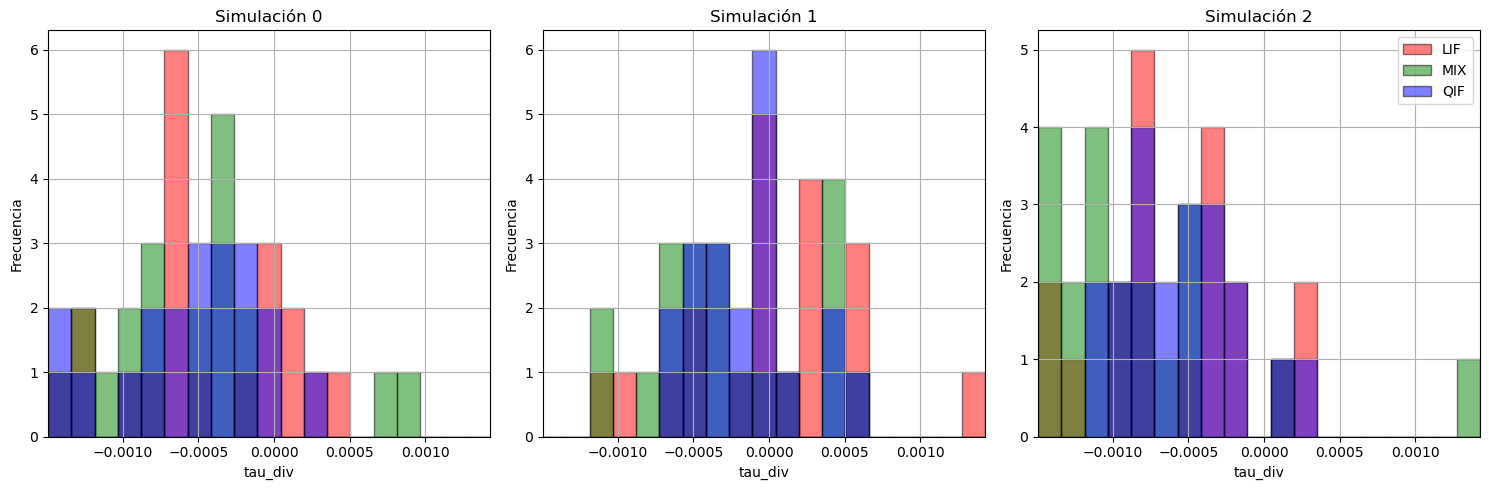

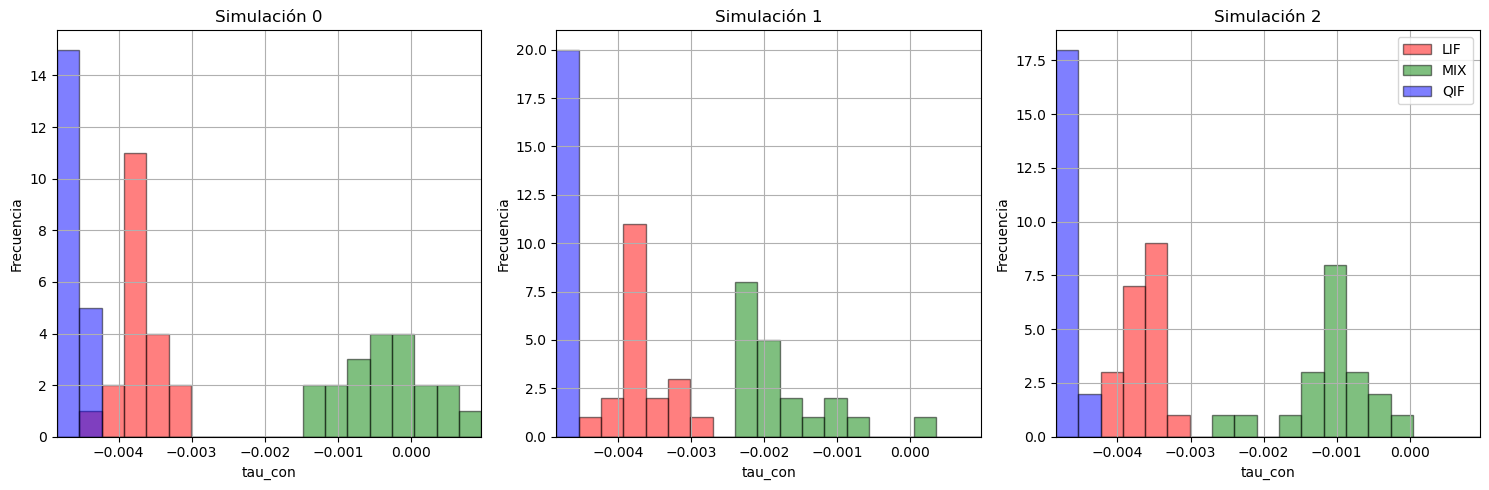

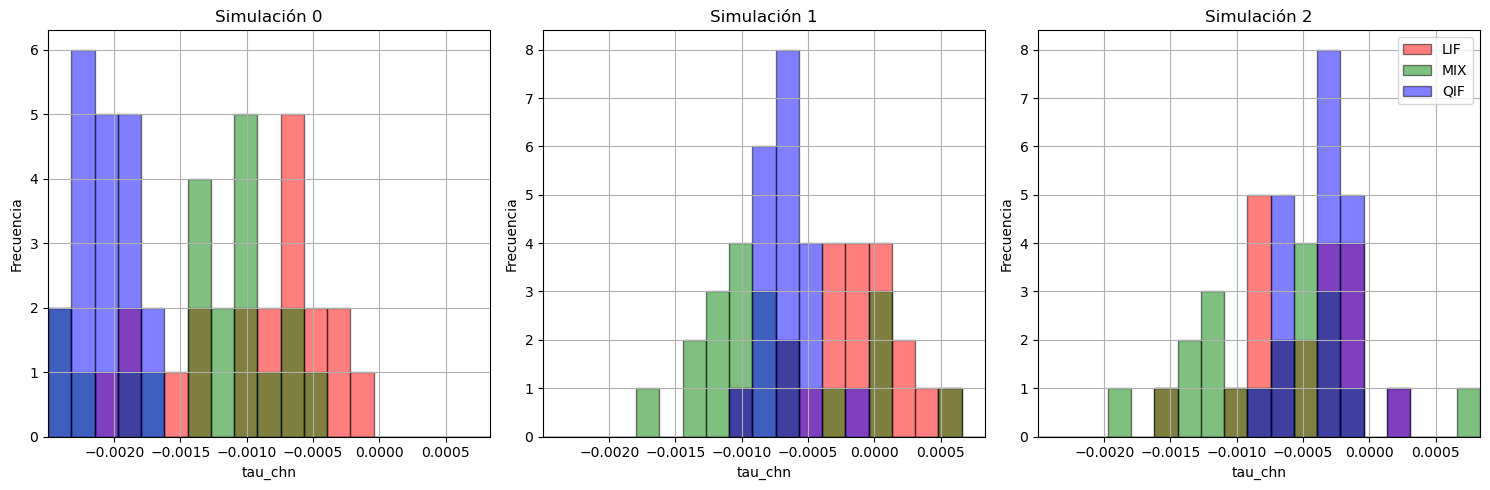

In [15]:
tau_vect = ['tau_rec','tau_div','tau_con','tau_chn']
num_sim = 4
for tau in tau_vect:

    min_val_all = np.inf
    max_val_all = -np.inf

    for i in range(3):
        num_sim = i
        nombre_archivo = f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
        data = pd.read_csv(nombre_archivo)

        # Llama a la función cargar_archivo_parametros con el nombre del archivo CSV
        nombre_carpeta = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}"
        filename_parametros = os.path.join(nombre_carpeta, f'simulacion_{num_sim}_parametros.csv')
        parametros = cargar_archivo_parametros(filename_parametros)

        # Ahora puedes acceder a los parámetros como lo harías normalmente
        N = parametros['N']
        nloop = parametros['nloop']
        cant_seed = parametros['cant_seed']

        df_nloop = data[(data['nloop'] == (nloop - 1))]
        min_val = np.min(df_nloop[tau])
        max_val = np.max(df_nloop[tau])
        min_val_all = min(min_val_all, min_val)
        max_val_all = max(max_val_all, max_val)

    num_bins = 20
    bins = np.linspace(min_val_all, max_val_all, num_bins)

    # Configurar subplots
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    colores = ['r', 'g', 'b']

    # Generar los histogramas con los bins definidos
    for i in range(3):
        num_sim = i
        nombre_archivo = f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_resultados.csv'
        data = pd.read_csv(nombre_archivo)

        nombre_carpeta = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}"
        filename_parametros = os.path.join(nombre_carpeta, f'simulacion_{num_sim}_parametros.csv')
        parametros = cargar_archivo_parametros(filename_parametros)

        N = parametros['N']
        nloop = parametros['nloop']
        cant_seed = parametros['cant_seed']

        df_nloop = data[(data['nloop'] == (nloop - 1))]

        for pq, pqif in enumerate(pqif_vector):
            color = colores[pq]
            label = ''
            if pqif == 0:
                label = 'LIF'
            elif pqif == 0.5:
                label = 'MIX'
            elif pqif == 1:
                label = 'QIF'
            df_nloop_pqif = df_nloop[(df_nloop['pqif'] == pqif)]
            axs[i].hist(df_nloop_pqif[tau], bins, edgecolor='black', label= label, color=color, alpha=0.5)
            axs[i].grid()
            axs[i].set_title(f'Simulación {i}')
            axs[i].set_xlabel(tau)
            axs[i].set_ylabel('Frecuencia')
            axs[i].set_xlim(min_val_all, max_val_all)

    # Agregar una única leyenda en el gráfico de la derecha
    axs[-1].legend(loc='upper right')
    plt.tight_layout()
    plt.show()



Text(0.5, 1.0, 'Subpoblaciones QIF LIF en el sistema MIX')

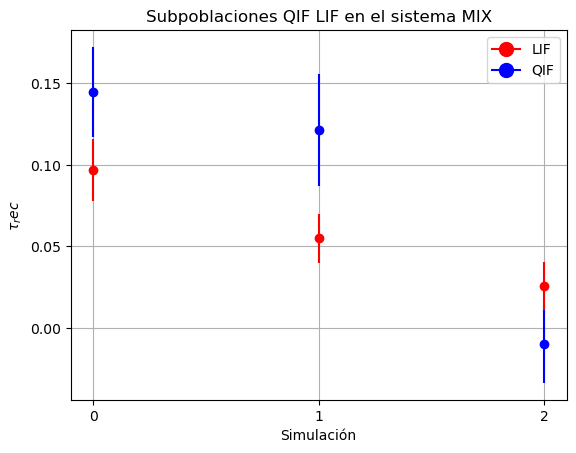

In [12]:
# Inicializar diccionarios para almacenar los valores de tau_rec para cada cuadrante, simulación y valor de pqif
simulations = [0,1,2]
tau_rec_cuadrante1 = {sim: {} for sim in range(3)}
tau_rec_cuadrante4 = {sim: {} for sim in range(3)}

# Bucle sobre las simulaciones
for num_sim in range(3):
    pqif = 0.5

    # Inicializar listas para almacenar los valores de tau_rec para cada semilla
    tau_rec1_list = []
    tau_rec4_list = []

    # Bucle sobre las semillas
    for k in range(cant_seed):
        matrix= csv_to_matrix(f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')

        rows, cols = matrix.shape
        mid_row, mid_col = rows // 2, cols // 2

        cuadrante1 = matrix[:mid_row, :mid_col] # Cuadrante superior izquierdo
        cuadrante4 = matrix[mid_row:, mid_col:]    # Cuadrante inferior derecho
        
        # Calcular tau_rec para cada cuadrante
        _, tau_rec1, _, _, _ = motifs(cuadrante1, N/2)
        _, tau_rec4, _, _, _ = motifs(cuadrante4, N/2)

        # Guardar los valores de tau_rec para cada cuadrante
        tau_rec1_list.append(tau_rec1)
        tau_rec4_list.append(tau_rec4)

    # Guardar los valores de tau_rec para cada valor de pqif
    tau_rec_cuadrante1[num_sim] = tau_rec1_list
    tau_rec_cuadrante4[num_sim] = tau_rec4_list


# Colores para los cuadrantes
color_cuadrante1 = 'blue'
color_cuadrante4 = 'red'

# Bucle sobre las simulaciones
for num_sim in range(3):
    # Calcular la media y la desviación estándar para cada cuadrante
    mean_tau_rec1 = np.mean(tau_rec_cuadrante1[num_sim])
    std_tau_rec1 = np.std(tau_rec_cuadrante1[num_sim])
    
    mean_tau_rec4 = np.mean(tau_rec_cuadrante4[num_sim])
    std_tau_rec4 = np.std(tau_rec_cuadrante4[num_sim])

    # Graficar tau_rec para cuadrante 1
    plt.errorbar(num_sim, mean_tau_rec1, yerr=std_tau_rec1, fmt='o', color=color_cuadrante1, label='Cuadrante 1' if num_sim == 0 else "")
    # Graficar tau_rec para cuadrante 4
    plt.errorbar(num_sim, mean_tau_rec4, yerr=std_tau_rec4, fmt='o', color=color_cuadrante4, label='Cuadrante 4' if num_sim == 0 else "")

# Etiquetas y leyenda
plt.xlabel('Simulación')
plt.ylabel(r'$\tau_rec$')
plt.legend()
plt.grid(True)
plt.xticks(simulations)
# Crear leyenda personalizada para los símbolos con etiquetas asociadas a cada pqif
legend_labels = []
for pqif in [0,1]:
    label = ''
    if pqif == 0:
        label = 'LIF'
    elif pqif == 1:
        label = 'QIF'
    legend_labels.append(plt.Line2D([0], [0], marker='o', color=colores[pqif_vector.index(pqif)], label=f'{label}', markersize=10))


plt.legend(handles=legend_labels, loc='upper right')
plt.title('Subpoblaciones QIF LIF en el sistema MIX')


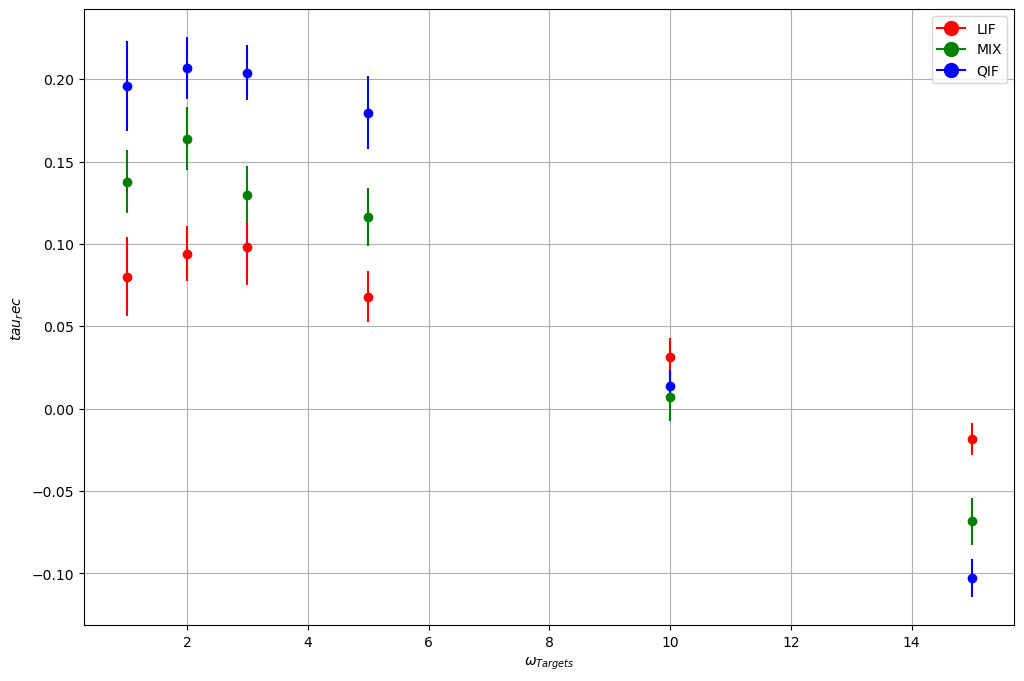

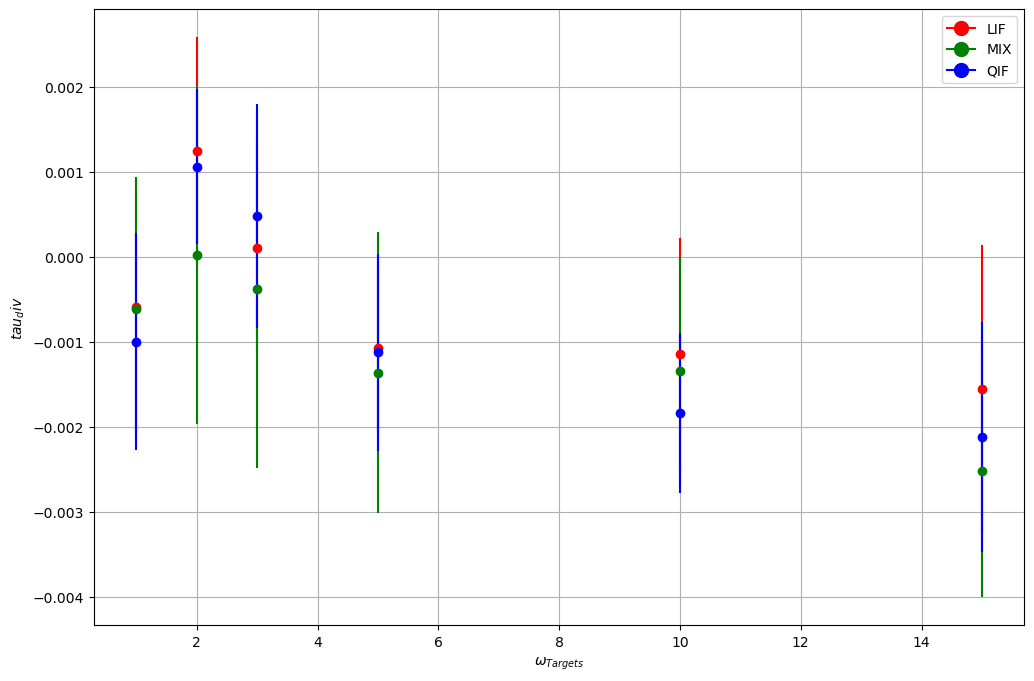

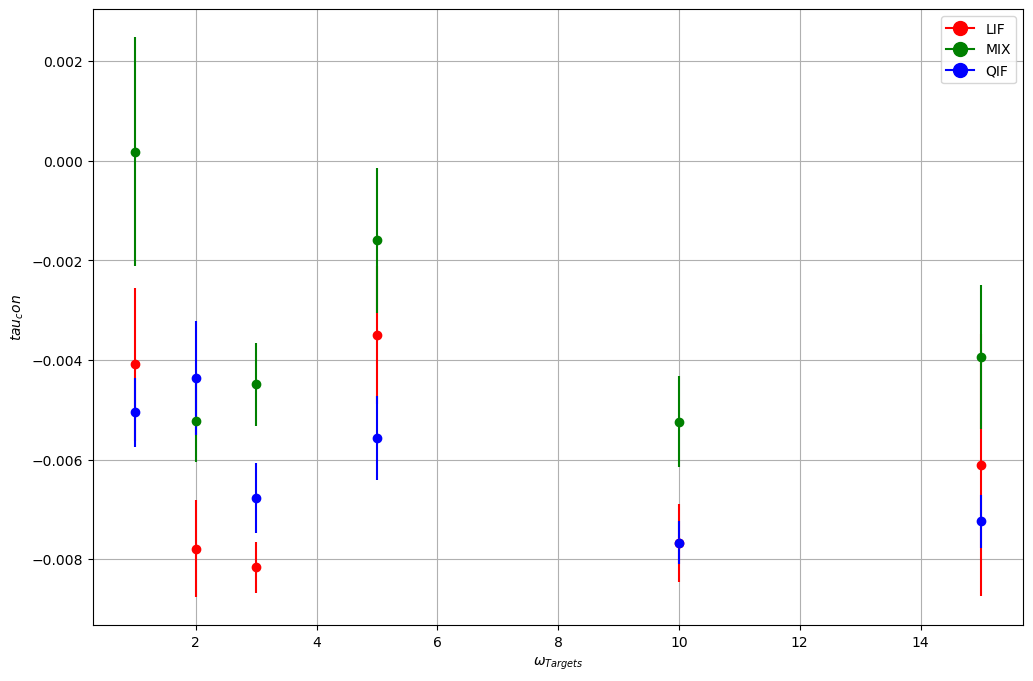

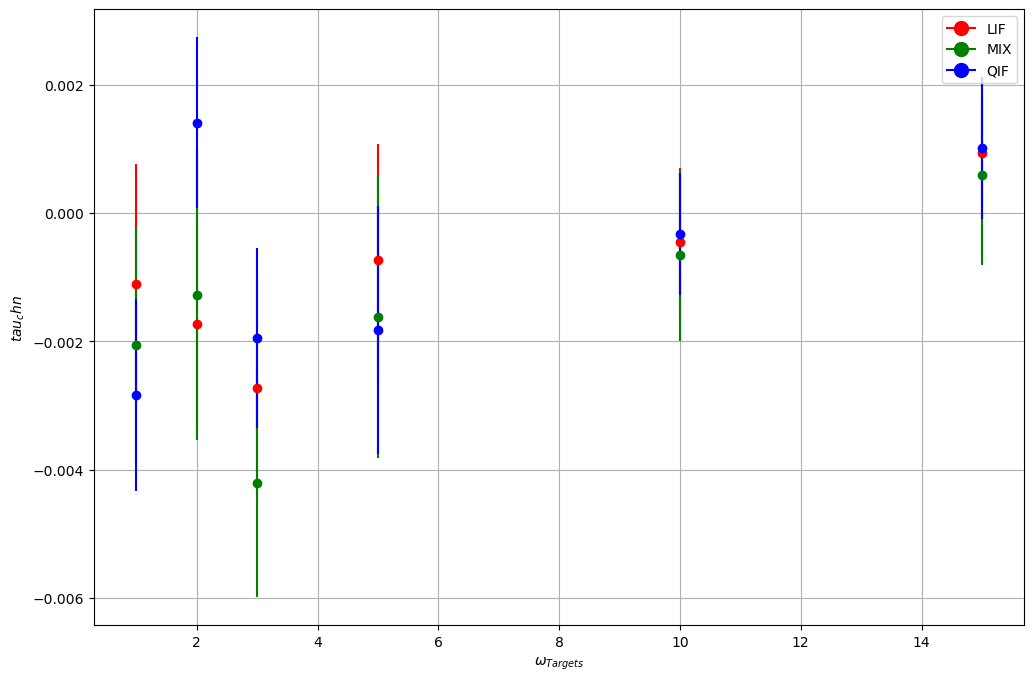

In [22]:
# Definir las frecuencias para cada simulación
frecuencias = {
    0: {'fb': 1, 'fa': 5},
    1: {'fb': 2, 'fa': 10},
    2: {'fb': 3, 'fa': 15}
}

# Definir los tipos de tau a calcular
tau_vect = ['tau_rec', 'tau_div', 'tau_con', 'tau_chn']

# Bucle sobre los tipos de tau
for tau in tau_vect:
    # Inicializar diccionarios para almacenar los valores de tau para cada cuadrante, simulación y valor de pqif
    tau_cuadrante1 = {sim: {} for sim in range(3)}
    tau_cuadrante4 = {sim: {} for sim in range(3)}

    # Bucle sobre las simulaciones
    for num_sim in range(3):
        # Leer el archivo que contiene las frecuencias de los targets de cada neurona
        nombre_archivo_frecuencias = f"/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_targets.csv"
        frecuencias_data = pd.read_csv(nombre_archivo_frecuencias)

        # Extraer los valores únicos de frecuencia
        valores_frecuencia = frecuencias_data['romega'].unique()
        valores_frecuencia = sorted(valores_frecuencia)

        # Crear un diccionario para almacenar las neuronas asociadas a cada frecuencia
        neuronas_por_frecuencia = {frecuencia: frecuencias_data[frecuencias_data['romega'] == frecuencia]['Neurona'].tolist() for frecuencia in valores_frecuencia}

        # Concatenar los vectores de índices de las neuronas para ambas frecuencias
        indices_frecuencia_1 = neuronas_por_frecuencia[valores_frecuencia[0]]
        indices_frecuencia_2 = neuronas_por_frecuencia[valores_frecuencia[1]]
        indices_concatenados = indices_frecuencia_1 + indices_frecuencia_2

        # Bucle sobre los valores de pqif
        for pqif, color in zip(pqif_vector, colores):
            # Inicializar listas para almacenar los valores de tau para cada semilla
            tau_list_cuadrante1 = []
            tau_list_cuadrante4 = []

            # Bucle sobre las semillas
            for k in range(cant_seed):
                matrix_ = csv_to_matrix(f'/home/martina/Tesis_2024/Dos_frecuencias/simulacion_{num_sim}/simulacion_{num_sim}_matrices_pesos/simulacion_{num_sim}_pesos_pqif_{pqif}_matriz_iloop_11_semilla_{k}')

                matrix = np.zeros((N, N))

                for i in range(N):
                    for j in range(N):
                        matrix[i,j] = matrix_[indices_concatenados[i], indices_concatenados[j]]

                rows, cols = matrix.shape
                mid_row, mid_col = rows // 2, cols // 2

                cuadrante1 = matrix[:mid_row, :mid_col] # Cuadrante superior izquierdo
                cuadrante4 = matrix[mid_row:, mid_col:]    # Cuadrante inferior derecho

                # Calcular tau para cada cuadrante
                sigma21, tau1, tau_div1, tau_con1, tau_chn1 = motifs(cuadrante1, N/2)
                sigma24, tau4, tau_div4, tau_con4, tau_chn4 = motifs(cuadrante4, N/2)

                # Guardar los valores de tau según la opción tau que se está iterando
                if tau == 'tau_rec':
                    tau_list_cuadrante1.append(tau1)
                    tau_list_cuadrante4.append(tau4)
                elif tau == 'tau_div':
                    tau_list_cuadrante1.append(tau_div1)
                    tau_list_cuadrante4.append(tau_div4)
                elif tau == 'tau_con':
                    tau_list_cuadrante1.append(tau_con1)
                    tau_list_cuadrante4.append(tau_con4)
                elif tau == 'tau_chn':
                    tau_list_cuadrante1.append(tau_chn1)
                    tau_list_cuadrante4.append(tau_chn4)
                
            # Guardar los valores de tau para cada valor de pqif
            tau_cuadrante1[num_sim][pqif] = tau_list_cuadrante1
            tau_cuadrante4[num_sim][pqif] = tau_list_cuadrante4

    # Calcular la media y la desviación estándar para cada cuadrante, simulación y valor de pqif
    media_tau_cuadrante1 = {sim: {pqif: np.mean(tau) for pqif, tau in values.items()} for sim, values in tau_cuadrante1.items()}
    std_tau_cuadrante1 = {sim: {pqif: np.std(tau) for pqif, tau in values.items()} for sim, values in tau_cuadrante1.items()}
    media_tau_cuadrante4 = {sim: {pqif: np.mean(tau) for pqif, tau in values.items()} for sim, values in tau_cuadrante4.items()}
    std_tau_cuadrante4 = {sim: {pqif: np.std(tau) for pqif, tau in values.items()} for sim, values in tau_cuadrante4.items()}

    # Graficar la media de tau para cada cuadrante en función de las frecuencias asociadas
    plt.figure(figsize=(12, 8))

    for num_sim in range(3):
        for pqif, color in zip(pqif_vector, colores):
            plt.errorbar(frecuencias[num_sim]['fb'], media_tau_cuadrante1[num_sim][pqif], yerr=std_tau_cuadrante1[num_sim][pqif], fmt='o', color=color, label=f'Simulación {num_sim + 1}, Cuadrante 1, pqif={pqif}')
            plt.errorbar(frecuencias[num_sim]['fa'], media_tau_cuadrante4[num_sim][pqif], yerr=std_tau_cuadrante4[num_sim][pqif], fmt='o', color=color, label=f'Simulación {num_sim + 1}, Cuadrante 4, pqif={pqif}')

    plt.xlabel(r'$\omega_{Targets}$')
    plt.ylabel(f'${tau}$')

    plt.grid(True)

    # Crear leyenda personalizada para los símbolos con etiquetas asociadas a cada pqif
    legend_labels = []
    for pqif in pqif_vector:
        label = ''
        if pqif == 0:
            label = 'LIF'
        elif pqif == 0.5:
            label = 'MIX'
        elif pqif == 1:
            label = 'QIF'
        legend_labels.append(plt.Line2D([0], [0], marker='o', color=colores[pqif_vector.index(pqif)], label=f'{label}', markersize=10))

    plt.legend(handles=legend_labels, loc='upper right')

    plt.show()
